In [1]:
# LOAD MODEL

import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model (make sure path is correct)
model = load_model(r"C:\Users\Devansh\Desktop\ProjectNew\Model_6_CNN\model_tb.h5")  # <- Replace with the actual path if needed

In [2]:
# PREPROCESS DATA

def predict_tb(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Get predictions from the model
    tb_pred, bbox_pred, severity_pred = model.predict(img_array)

    # TB classification
    tb_class = "tb" if tb_pred[0][1] > 0.5 else "no tb"

    # Bounding box prediction
    if tb_class == "tb":
        bbox = {
            'xmin': float(bbox_pred[0][0]),
            'ymin': float(bbox_pred[0][1]),
            'width': float(bbox_pred[0][2]),
            'height': float(bbox_pred[0][3])
        }
    else:
        bbox = "none"

    # Severity classification
    severity_classes = ["none", "latent_tb", "active_tb"]
    severity_class = severity_classes[np.argmax(severity_pred)]

    return {
        "TB Classification": tb_class,
        "Bounding Box": bbox,
        "TB Severity": severity_class
    }

In [6]:
# SINGLE IMAGE PREDICTION

image_path = r"C:\Users\Devansh\Desktop\ProjectNew\Datasets\tbx11k-simplified\images\tb1093.png" # <- Replace with your image path
result = predict_tb(image_path)

# Print results
print("\n--- Prediction Results ---")
for key, value in result.items():
    print(f"{key}: {value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

--- Prediction Results ---
TB Classification: tb
Bounding Box: {'xmin': 204.3399658203125, 'ymin': 88.76148986816406, 'width': 139.50881958007812, 'height': 150.5101776123047}
TB Severity: active_tb


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


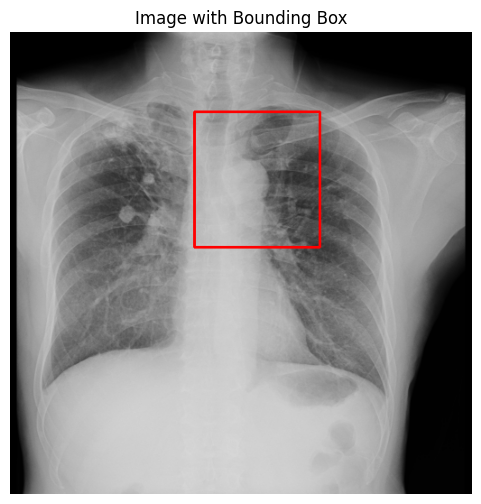

In [7]:
# BOUNDING BOX PLOTTING

import cv2
import matplotlib.pyplot as plt

def show_image_with_bbox(image_path, bbox):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    if bbox != "none":
        xmin = int(bbox['xmin'])
        ymin = int(bbox['ymin'])
        xmax = xmin + int(bbox['width'])
        ymax = ymin + int(bbox['height'])

        # Draw the bounding box in red
        cv2.rectangle(img_color, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image with Bounding Box")
    plt.show()

result = predict_tb(image_path)
show_image_with_bbox(image_path, result["Bounding Box"])
